In [ ]:

# import data from drive

from google.colab import drive
drive.mount('/content/gdrive')

!unzip -q "/content/gdrive/My Drive/Brain_Tumour_MRI_Data.zip"
!unzip -q "/content/gdrive/My Drive/Brain_model.h5.zip"


Mounted at /content/gdrive


In [ ]:
'''

project : Covid-19-detection-using-Xray
Author : @kanishksh4rma

'''

'\n\nproject : Covid-19-detection-using-Xray\nAuthor : @kanishksh4rma\n\n'

In [ ]:
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import os

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.layers import AveragePooling2D, Dropout,Flatten,Dense,Input
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [ ]:
dataset = "/content/Brain_Tumour_MRI_Data"   # path to the dataset
args={}
args["dataset"]=dataset

In [ ]:
import numpy as np
import cv2
img_paths = list(paths.list_images(args["dataset"]))  #image paths
data = []
labels = []
for path in img_paths:
    label = path.split(os.path.sep)[-2]   #split the image paths
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Convert images into RGB Channel
                                                   # Though it isnt necessary for X-ray images
    
    image = cv2.resize(image, (224, 224))  #Resizing the images
    data.append(image)
    labels.append(label)
data = np.array(data) / 255.0
labels = np.array(labels)

In [ ]:
sum=0
for i in data:
  sum += 1
print(sum)

3000


In [ ]:
Data_Dir = "/content/Brain_Tumour_MRI_Data/"

In [ ]:
Cimages = os.listdir(Data_Dir+"Tumour")
Nimages = os.listdir(Data_Dir+"Normal")

Normal Brain MRI Vs Tumour


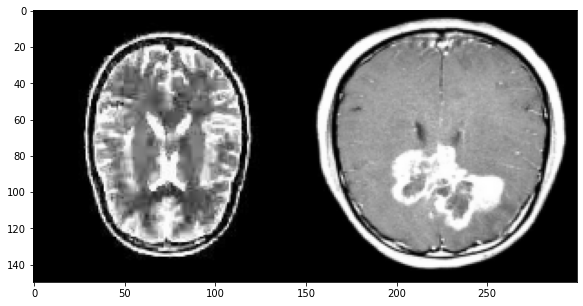

Normal Brain MRI Vs Tumour


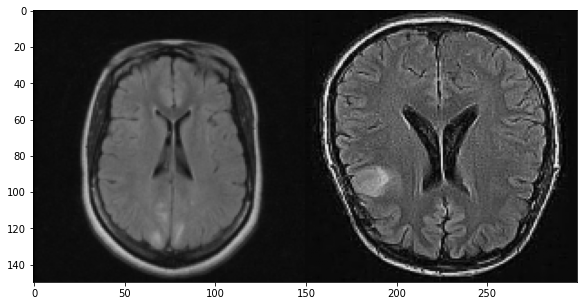

Normal Brain MRI Vs Tumour


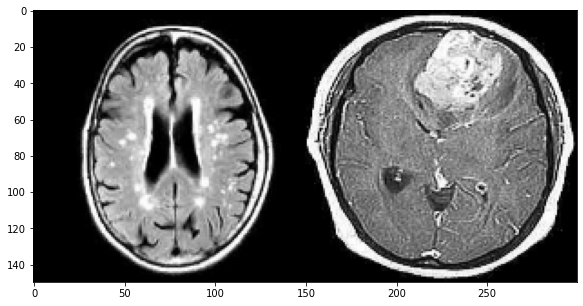

Normal Brain MRI Vs Tumour


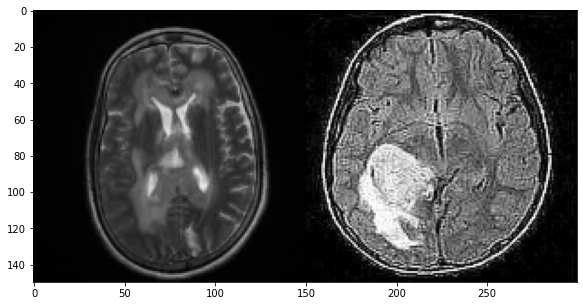

Normal Brain MRI Vs Tumour


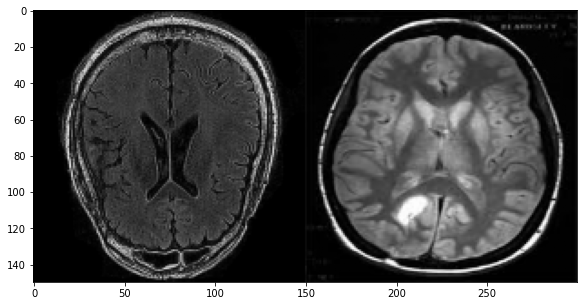

In [ ]:
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage.transform import resize
import numpy as np

# plot some of the X-rays
def plotter(i):
    normal = cv2.imread(Data_Dir+"Normal//"+Nimages[i])
    normal = skimage.transform.resize(normal, (150, 150, 3))
    coronavirus = cv2.imread(Data_Dir+"Tumour//"+Cimages[i])
    coronavirus = skimage.transform.resize(coronavirus, (150, 150, 3) , mode = 'reflect')
    pair = np.concatenate((normal, coronavirus), axis=1)
    print("Normal Brain MRI Vs Tumour")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,5):
    plotter(i)


In [ ]:
LB = LabelBinarizer()  
#Initialize label binarizer
labels = LB.fit_transform(labels)
labels = to_categorical(labels)

In [ ]:
# test train split
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels,
    test_size=0.20, stratify=labels, random_state=42)

In [ ]:
#rotate images to create more data
trainAug = ImageDataGenerator(
    rotation_range=15,
    fill_mode="nearest")

In [ ]:
bModel = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))  #base_Model
hModel = bModel.output #head_Model
hModel = AveragePooling2D(pool_size=(4, 4))(hModel)
hModel = Flatten(name="flatten")(hModel)
hModel = Dense(64, activation="relu")(hModel)
hModel = Dropout(0.5)(hModel)
hModel = Dense(2, activation="softmax")(hModel)
model = Model(inputs=bModel.input, outputs=hModel)

for layer in bModel.layers:
    layer.trainable = False

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((2400, 224, 224, 3), (600, 224, 224, 3), (2400, 2), (600, 2))

In [ ]:
INIT_LR = 1e-3
EPOCHS = 10
BS = 8

In [ ]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

R = model.fit_generator(
    trainAug.flow(X_train, Y_train, batch_size=BS),
    steps_per_epoch=len(X_train) // BS,
    validation_data=(X_test, Y_test),
    validation_steps=len(X_test) // BS,
    epochs=EPOCHS)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
300/300 [==============================] - 33s 109ms/step - loss: 0.6076 - accuracy: 0.6762 - val_loss: 0.4533 - val_accuracy: 0.8250
Epoch 2/10
300/300 [==============================] - 32s 107ms/step - loss: 0.4747 - accuracy: 0.7833 - val_loss: 0.3773 - val_accuracy: 0.8517
Epoch 3/10
300/300 [==============================] - 32s 106ms/step - loss: 0.4288 - accuracy: 0.8075 - val_loss: 0.3220 - val_accuracy: 0.8683
Epoch 4/10
300/300 [==============================] - 32s 106ms/step - loss: 0.3893 - accuracy: 0.8254 - val_loss: 0.3130 - val_accuracy: 0.8850
Epoch 5/10
300/300 [==============================] - 32s 107ms/step - loss: 0.3757 - accuracy: 0.8392 - val_loss: 0.2794 - val_accuracy: 0.8817
Epoch 6/10
300/300 [==============================] - 32s 105ms/step - loss: 0.3580 - accuracy: 0.8404 - val_loss: 0.2809 - val_accuracy: 0.8950
Epoch 7/10
300/300 [==============================] - 

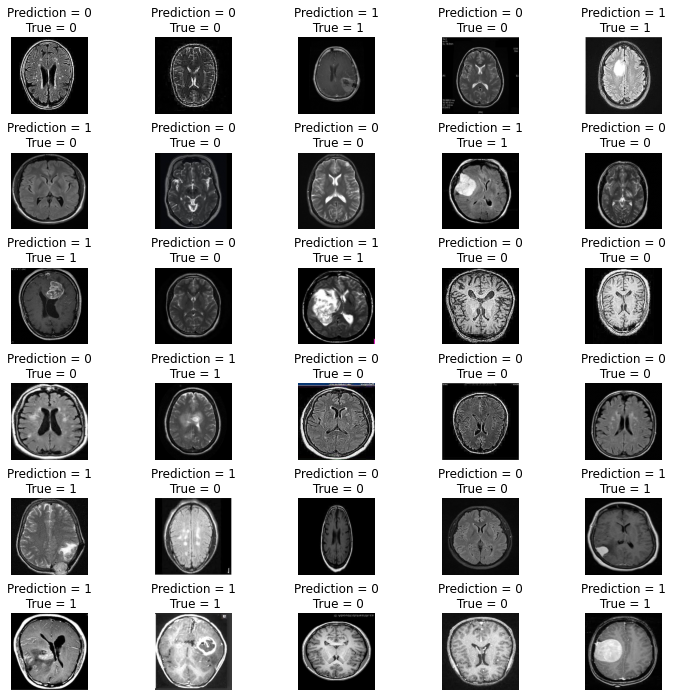

In [ ]:

# Let's test on some random test data
L = 6
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
y_pred = model.predict(X_test, batch_size=BS)
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(y_pred.argmax(axis=1)[i], Y_test.argmax(axis=1)[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 0.5, hspace=0.5)   

Wow! All every prediction are correct.

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test, batch_size=BS)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(Y_test.argmax(axis=1), y_pred,target_names=LB.classes_))

              precision    recall  f1-score   support

      Normal       0.94      0.90      0.92       300
      Tumour       0.90      0.94      0.92       300

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600



In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy score : ',accuracy_score(Y_test.argmax(axis=1),y_pred)*100,'%')

Accuracy score :  92.0 %


In [ ]:
from sklearn.metrics import confusion_matrix

# check for Sensitivity & Specificity

cm = confusion_matrix(Y_test.argmax(axis=1), y_pred)
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print('Confusion Matrice : ')
print(cm)
print('-----------------------------')
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

Confusion Matrice : 
[[269  31]
 [ 17 283]]
-----------------------------
sensitivity: 0.8967
specificity: 0.9433


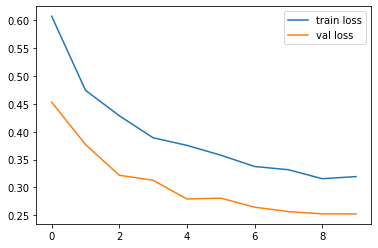

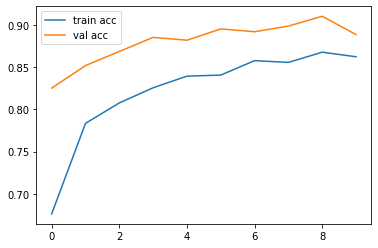

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('LossVal_acc')

In [ ]:
model.save('Brain_model.h5')

In [ ]:
from flask import jsonify
from keras.preprocessing import image
from keras.models import load_model
print('making model ')
from google.colab import files
image1 = files.upload()
image_list = list(image1.keys())
image1 = image_list[0]
print('Image : ',image1)
print('=========================')
print('File uploaded successfully!!!')
print('=========================')

import numpy as np
from flask import jsonify
from keras.preprocessing import image
from keras.models import load_model

print('fetching results...')
new_model = load_model('/content/Brain_model.h5')
test_image = image.load_img(image1,target_size=(224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = new_model.predict(test_image)
print('Results : ',result)
y_pred = np.argmax(result, axis=1)
print('Model prediction: ',result)
#if result[0][0]<result[0][1] and result[0][0]>4.226988e-15:
#if result[0][0]>=1.0 and result[0][1]>=1.8687282e-25 or result[0][1]>=1.0 and result[0][0]>=1.8687282e-25:
if result[0][0]==1.0 and result[0][1]==0 :#or result[0][1]==1.0 and result[0][0]==0:
  prediction = "Please upload MRIs only"
elif y_pred == 1:
  prediction = 'Patient has Tumour'
  #return 1
else:
  prediction = 'Patient is Healthy'
  #return 0
print('YPred',y_pred)
print('===================================')
print(prediction)
print('===================================')


making model 


Saving 300px-Hirnmetastase_MRT-T1_KM.jpg to 300px-Hirnmetastase_MRT-T1_KM (1).jpg
Image :  300px-Hirnmetastase_MRT-T1_KM.jpg
File uploaded successfully!!!
fetching results...
Results :  [[0. 1.]]
Model prediction:  [[0. 1.]]
YPred [1]
Patient has Tumour
